In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [3]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [4]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
data = raw_data.dropna(axis=0)

In [9]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


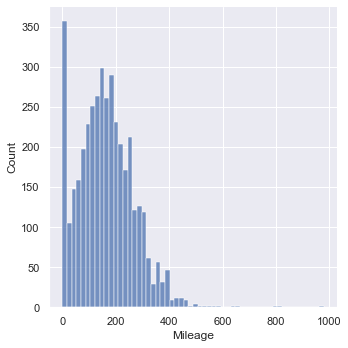

In [15]:
sns.displot(data['Mileage'])

In [16]:
q = data['Mileage'].quantile(0.90)
data_1 = data[data['Mileage']<q]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

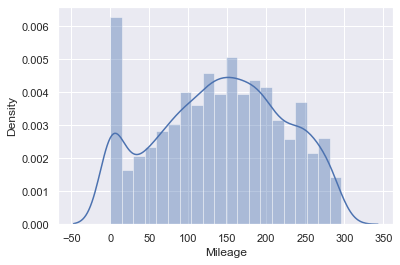

In [18]:
sns.distplot(data_1['Mileage'])

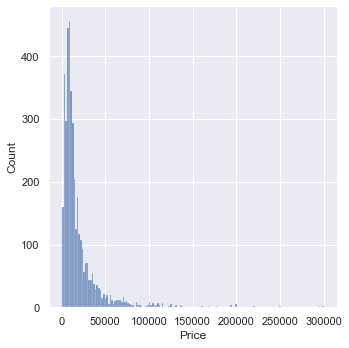

In [20]:
sns.displot(data['Price'])

In [25]:
q = data_1['Price'].quantile(0.80)
data_2 = data_1[data_1['Price']<q]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

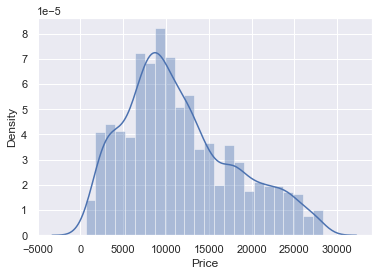

In [26]:
sns.distplot(data_2['Price'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

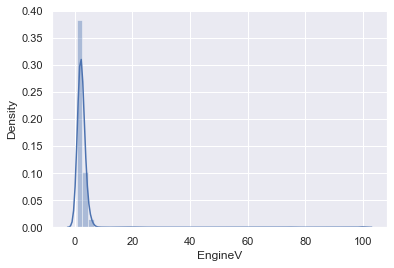

In [27]:
sns.distplot(data_2['EngineV'])

In [28]:
data_3 = data_2[data_2["EngineV"]<6.5]

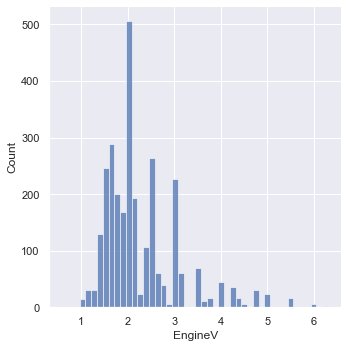

In [47]:
sns.displot(data_3['EngineV'])

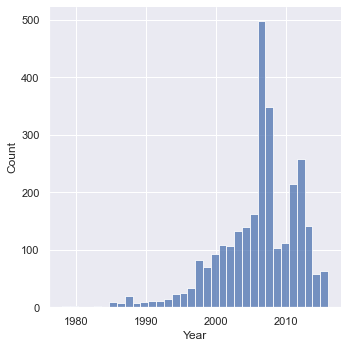

In [31]:
sns.displot(data_3['Year'])

In [32]:
q = data_3['Year'].quantile(0.10)
data_4 = data_3[data_3['Year']>q]

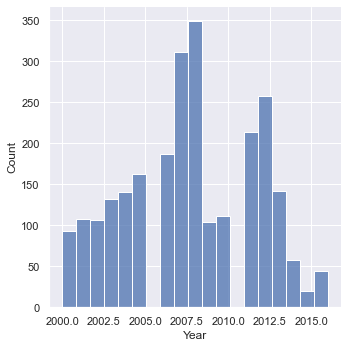

In [34]:
sns.displot(data_4['Year'])

In [41]:
data_cleaned = data_4.reset_index(drop = True)

In [42]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,2540,2540.000000,2540,2540.000000,2540.000000,2540,2540,2540.000000,2540
unique,7,NaN,6,NaN,NaN,4,2,NaN,204
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,Kangoo
freq,644,NaN,913,NaN,NaN,1175,2327,NaN,126
mean,NaN,12613.986610,NaN,156.668898,2.276638,NaN,NaN,2007.614173,NaN
std,NaN,6145.603026,NaN,69.074922,0.850015,NaN,NaN,3.908358,NaN
min,NaN,1600.000000,NaN,0.000000,0.600000,NaN,NaN,2000.000000,NaN
25%,NaN,8100.000000,NaN,111.000000,1.600000,NaN,NaN,2005.000000,NaN
50%,NaN,11401.995000,NaN,160.000000,2.000000,NaN,NaN,2008.000000,NaN
75%,NaN,16825.000000,NaN,206.000000,2.500000,NaN,NaN,2011.000000,NaN


# Checking OLS ASsumptions

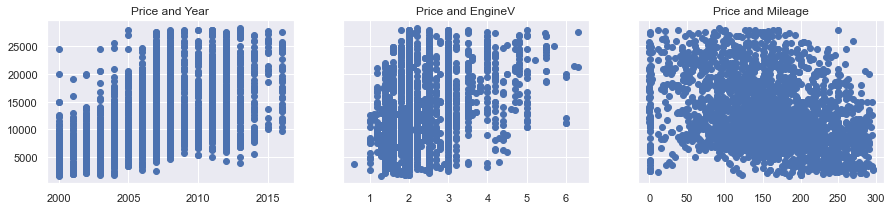

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

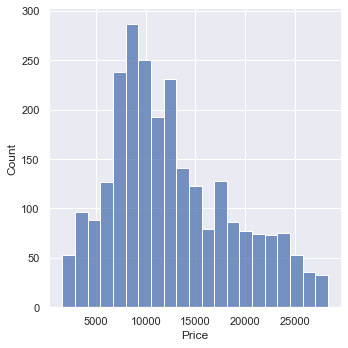

In [46]:
sns.displot(data_cleaned['Price'])

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [49]:
vif

,VIF,features
0,6.456988,Mileage
1,11.003269,Year
2,8.610234,EngineV


In [50]:
data_nomulti_ = data_cleaned.drop(['Year'], axis =1)

In [52]:
data_nomulti_.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model
count,2540,2540.000000,2540,2540.000000,2540.000000,2540,2540,2540
unique,7,NaN,6,NaN,NaN,4,2,204
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,Kangoo
freq,644,NaN,913,NaN,NaN,1175,2327,126
mean,NaN,12613.986610,NaN,156.668898,2.276638,NaN,NaN,NaN
std,NaN,6145.603026,NaN,69.074922,0.850015,NaN,NaN,NaN
min,NaN,1600.000000,NaN,0.000000,0.600000,NaN,NaN,NaN
25%,NaN,8100.000000,NaN,111.000000,1.600000,NaN,NaN,NaN
50%,NaN,11401.995000,NaN,160.000000,2.000000,NaN,NaN,NaN
75%,NaN,16825.000000,NaN,206.000000,2.500000,NaN,NaN,NaN


# Dummy variables

In [57]:
data_with_dummies = pd.get_dummies(data_nomulti_, drop_first = True)

In [58]:
data_with_dummies.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Venza,Model_Viano,Model_Virage,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X6,Model_Yaris,Model_Z4
0,23000.0,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18300.0,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14200.0,200,2.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10799.0,193,1.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11950.0,177,1.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [60]:
targets = data_with_dummies['Price']
inputs = data_with_dummies.drop(['Price'], axis =1)

In [68]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [69]:
inputs_scaled = scaler.transform(inputs)

In [70]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [71]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [72]:
y_hat = reg.predict(x_train)

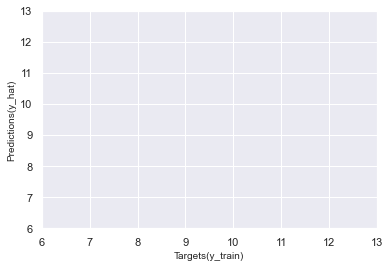

In [73]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', fontsize =10)
plt.ylabel('Predictions(y_hat)', fontsize =10)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

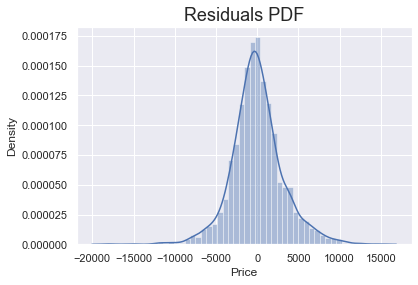

In [74]:
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [75]:
reg.score(x_train, y_train)

0.7437523361423879

In [76]:
reg.intercept_

692336051869342.1

In [77]:
reg.coef_

array([-2.40107739e+03,  4.64498142e+02,  3.33174632e+16,  3.90566844e+16,
        1.38396329e+16,  2.90941388e+16,  1.16105241e+16,  1.28413973e+16,
       -2.32800893e+02,  8.40000000e+01, -1.91000000e+02, -1.64000000e+02,
       -4.39375000e+01, -8.32000000e+02, -1.51343750e+02, -9.40000000e+02,
        2.28800000e+03, -1.33535947e+15, -1.54163638e+15, -7.71273980e+14,
       -1.09053130e+15, -3.93724344e+16, -1.54163638e+15, -2.66597755e+15,
       -4.59563726e+15, -1.72326201e+15, -2.17848299e+15, -1.09053130e+15,
       -1.09053130e+15, -4.05944034e+15, -1.72326201e+15, -2.77428853e+15,
       -7.71273980e+14, -4.78042467e+15, -7.71273980e+14, -7.71273980e+14,
       -1.81338610e+16, -1.09053130e+15, -7.71273980e+14, -2.55298396e+15,
       -1.09053130e+15, -1.54163638e+15, -1.72326201e+15, -1.09053130e+15,
       -1.09053130e+15, -1.09053130e+15, -1.09053130e+15, -1.54163638e+15,
        2.38959722e+15,  3.89834873e+15,  8.11038984e+15,  1.95148245e+15,
        3.64729136e+15,  

In [107]:
pd.options.display.max_rows = 999
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-2401.08
1,EngineV,464.50
2,Brand_BMW,33317463193804208.00
3,Brand_Mercedes-Benz,39056684359955056.00
4,Brand_Mitsubishi,13839632910876834.00
5,Brand_Renault,29094138790248076.00
6,Brand_Toyota,11610524087784930.00
7,Brand_Volkswagen,12841397295392894.00
8,Body_hatch,-232.80
9,Body_other,84.00


In [106]:
data_cleaned['Model'].unique()

array(['Q7', 'Rav 4', 'A6', 'Megane', 'A6 Allroad', 'Passat B6',
       'Land Cruiser 100', 'Clio', '318', 'Polo', 'Outlander', 'A8',
       'Touareg', 'Vito', 'Colt', 'Z4', 'Pajero Wagon', 'Caddy', 'Camry',
       'Kangoo', 'ML 350', 'X5', 'Trafic', 'Lancer', 'E-Class', 'Scenic',
       '330', 'Passat B5', 'Land Cruiser Prado', 'Caravelle', 'Avensis',
       'GL 450', 'Lancer X', 'Outlander XL', 'A 150', 'Koleos',
       'Passat B7', 'Scirocco', 'M5', '520', 'A5', 'ML 270', 'Tiguan',
       'C-Class', 'Lupo', '5 Series', 'T5 (Transporter)', '525',
       'Corolla', 'Galant', 'CLK 240', 'Multivan', 'Vaneo', 'X1',
       'T5 (Transporter) ', 'S 400', 'S 550', 'A4 Allroad', 'L 200',
       'Jetta', 'Logan', 'Pajero Sport', '730', 'Lancer X Sportback',
       'Golf Plus', 'Passat CC', 'Up', 'Amarok', 'S 500', 'Auris', '530',
       'Dokker', 'Golf VI', 'Golf VII', 'A 170', 'Laguna', 'New Beetle',
       'Sprinter 319', '320', 'Viano', 'Sharan', 'Prius', 'B 180',
       'Fluence', 'Duster'

In [80]:
y_hat_test = reg.predict(x_test)

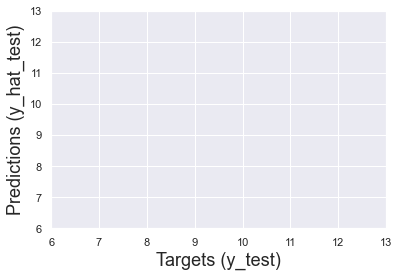

In [81]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [84]:
y_test = y_test.reset_index(drop=True)

In [85]:
y_test

0      10500.0
1       6999.0
2      10100.0
3       8000.0
4       8300.0
        ...   
503    24000.0
504    24500.0
505    10999.0
506    12700.0
507    23999.0
Name: Price, Length: 508, dtype: float64

In [90]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf

,Predictions
0,8.878125e+03
1,9.422125e+03
2,1.367812e+04
3,4.374125e+03
4,1.094212e+04
...,...
503,2.185412e+04
504,2.498212e+04
505,-1.900795e+18
506,1.078212e+04


In [94]:
df_pf['Targets'] = y_test

In [96]:
df_pf

,Predictions,Target,Residual,Targets
0,8.878125e+03,10500.0,1.621875e+03,10500.0
1,9.422125e+03,6999.0,-2.423125e+03,6999.0
2,1.367812e+04,10100.0,-3.578125e+03,10100.0
3,4.374125e+03,8000.0,3.625875e+03,8000.0
4,1.094212e+04,8300.0,-2.642125e+03,8300.0
...,...,...,...,...
503,2.185412e+04,24000.0,2.145875e+03,24000.0
504,2.498212e+04,24500.0,-4.821250e+02,24500.0
505,-1.900795e+18,10999.0,1.900795e+18,10999.0
506,1.078212e+04,12700.0,1.917875e+03,12700.0


In [97]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf.head()

,Predictions,Target,Residual,Targets
0,8878.125,10500.0,1621.875,10500.0
1,9422.125,6999.0,-2423.125,6999.0
2,13678.125,10100.0,-3578.125,10100.0
3,4374.125,8000.0,3625.875,8000.0
4,10942.125,8300.0,-2642.125,8300.0


In [99]:
df_pf.drop(['Target'], axis = 1)

,Predictions,Residual,Targets
0,8.878125e+03,1.621875e+03,10500.0
1,9.422125e+03,-2.423125e+03,6999.0
2,1.367812e+04,-3.578125e+03,10100.0
3,4.374125e+03,3.625875e+03,8000.0
4,1.094212e+04,-2.642125e+03,8300.0
...,...,...,...
503,2.185412e+04,2.145875e+03,24000.0
504,2.498212e+04,-4.821250e+02,24500.0
505,-1.900795e+18,1.900795e+18,10999.0
506,1.078212e+04,1.917875e+03,12700.0


In [100]:
df_pf['% Difference'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

,Predictions,Target,Residual,Targets,% Difference
0,8.878125e+03,10500.0,1.621875e+03,10500.0,1.544643e+01
1,9.422125e+03,6999.0,-2.423125e+03,6999.0,3.462102e+01
2,1.367812e+04,10100.0,-3.578125e+03,10100.0,3.542698e+01
3,4.374125e+03,8000.0,3.625875e+03,8000.0,4.532344e+01
4,1.094212e+04,8300.0,-2.642125e+03,8300.0,3.183283e+01
...,...,...,...,...,...
503,2.185412e+04,24000.0,2.145875e+03,24000.0,8.941146e+00
504,2.498212e+04,24500.0,-4.821250e+02,24500.0,1.967857e+00
505,-1.900795e+18,10999.0,1.900795e+18,10999.0,1.728153e+16
506,1.078212e+04,12700.0,1.917875e+03,12700.0,1.510138e+01


In [101]:
df_pf.describe()

,Predictions,Target,Residual,Targets,% Difference
count,5.080000e+02,508.000000,5.080000e+02,508.000000,5.080000e+02
mean,3.461680e+15,12483.523661,-3.461680e+15,12483.523661,3.538759e+14
std,2.493435e+17,5924.519368,2.493435e+17,5924.519368,2.602944e+15
min,-1.945820e+18,1999.000000,-1.912171e+18,1999.000000,1.551418e-01
25%,8.884125e+03,8300.000000,-1.956125e+03,8300.000000,7.374287e+00
50%,1.209412e+04,11300.000000,-1.691250e+02,11300.000000,1.659824e+01
75%,1.606012e+04,15900.000000,2.000875e+03,15900.000000,3.207818e+01
max,1.912171e+18,28350.000000,1.945820e+18,28350.000000,3.603371e+16


In [103]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['% Difference'])

,Predictions,Target,Residual,Targets,% Difference
156,14078.12,14100.00,21.88,14100.00,0.16
168,10618.12,10600.00,-18.12,10600.00,0.17
333,10630.12,10650.00,19.88,10650.00,0.19
97,8522.12,8500.00,-22.12,8500.00,0.26
32,20966.12,20900.00,-66.12,20900.00,0.32
54,6878.12,6900.00,21.88,6900.00,0.32
451,10630.12,10700.00,69.88,10700.00,0.65
93,23294.12,23500.00,205.88,23500.00,0.88
245,8718.12,8800.00,81.88,8800.00,0.93
324,9406.12,9300.00,-106.12,9300.00,1.14
